In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

---
###

### Adult education level
    - measured as a percentage of same age population

In [3]:
#-- oecd file
level_edu_data_to_load = "Resources/Adult_edu_level.csv"

edu_level_complete= pd.read_csv(level_edu_data_to_load)#,index_col=0)
edu_level_complete.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2000,41.212311,NaN
1,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2001,41.076141,NaN
2,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2002,39.050316,NaN
3,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2003,37.519817,NaN
4,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2004,35.879036,NaN


In [4]:
edu_level_complete=edu_level_complete.drop(['Flag Codes','FREQUENCY'],axis=1)
edu_level_complete

,LOCATION,INDICATOR,SUBJECT,MEASURE,TIME,Value
0,AUS,EDUADULT,BUPPSRY,PC_25_64,2000,41.212311
1,AUS,EDUADULT,BUPPSRY,PC_25_64,2001,41.076141
2,AUS,EDUADULT,BUPPSRY,PC_25_64,2002,39.050316
3,AUS,EDUADULT,BUPPSRY,PC_25_64,2003,37.519817
4,AUS,EDUADULT,BUPPSRY,PC_25_64,2004,35.879036
...,...,...,...,...,...,...
2282,G20,EDUADULT,BUPPSRY,PC_25_64,2011,36.556688
2283,G20,EDUADULT,TRY,PC_25_64,2010,28.207440
2284,G20,EDUADULT,TRY,PC_25_64,2011,27.866679
2285,G20,EDUADULT,UPPSRY,PC_25_64,2010,36.839818


In [5]:
# -- reduce to 2009-2018 only
edu_level_reducetime=edu_level_complete[(edu_level_complete['TIME']>=2009)&(edu_level_complete['TIME']<=2018)]

edu_level_reducetime


,LOCATION,INDICATOR,SUBJECT,MEASURE,TIME,Value
9,AUS,EDUADULT,BUPPSRY,PC_25_64,2009,28.972523
10,AUS,EDUADULT,BUPPSRY,PC_25_64,2010,26.792744
11,AUS,EDUADULT,BUPPSRY,PC_25_64,2011,25.922543
12,AUS,EDUADULT,BUPPSRY,PC_25_64,2012,23.563389
13,AUS,EDUADULT,BUPPSRY,PC_25_64,2013,24.284430
...,...,...,...,...,...,...
2282,G20,EDUADULT,BUPPSRY,PC_25_64,2011,36.556688
2283,G20,EDUADULT,TRY,PC_25_64,2010,28.207440
2284,G20,EDUADULT,TRY,PC_25_64,2011,27.866679
2285,G20,EDUADULT,UPPSRY,PC_25_64,2010,36.839818


In [6]:
# country abbreviation list

country_list=['HUN', 'POL', 'MEX', 'SWE', 'FRA', 'NOR', 'ISL', 'LVA', 'EST',
        'CHE', 'BEL', 'ISR', 'CAN', 'NZL', 'IRL', 'CHL', 'ESP', 'FIN',
       'LUX', 'KOR', 'GBR', 'AUS', 'NLD', 'TUR', 'GRC', 'AUT', 'DNK',
       'SVK', 'SVN', 'JPN', 'CZE', 'DEU', 'PRT', 'ITA', 'LTU', 'USA']

In [7]:
# choose only the following countries
edu_level_clean=edu_level_reducetime[edu_level_reducetime['LOCATION'].isin(country_list)]

edu_level_clean.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,TIME,Value
9,AUS,EDUADULT,BUPPSRY,PC_25_64,2009,28.972523
10,AUS,EDUADULT,BUPPSRY,PC_25_64,2010,26.792744
11,AUS,EDUADULT,BUPPSRY,PC_25_64,2011,25.922543
12,AUS,EDUADULT,BUPPSRY,PC_25_64,2012,23.563389
13,AUS,EDUADULT,BUPPSRY,PC_25_64,2013,24.284430


In [8]:
# list of full country names
country_list_full=['Hungary', 'Poland', 'Mexico', 'Sweden', 'France', 'Norway',
        'Iceland', 'Latvia', 'Estonia','Switzerland', 'Belgium', 'Israel',
        'Canada', 'New Zealand', 'Ireland','Chile', 'Spain', 'Finland',
        'Luxembourg', 'Korea', 'United Kingdom','Australia', 'Netherlands',
        'Turkey', 'Greece', 'Austria', 'Denmark','Slovak Republic', 'Slovenia',
        'Japan', 'Czech Republic', 'Germany','Portugal', 'Italy', 'Lithuania',
        'United States']

In [9]:
country_abr=pd.Series(country_list, name='LOCATION') 
country_names=pd.Series(country_list_full, name='Country')

df_country=pd.concat([country_abr, country_names], axis=1)
#df_country

In [10]:
# add country names
edu_level_clean=pd.merge(edu_level_clean, df_country, how='left', on=['LOCATION','LOCATION'])

edu_level_clean

,LOCATION,INDICATOR,SUBJECT,MEASURE,TIME,Value,Country
0,AUS,EDUADULT,BUPPSRY,PC_25_64,2009,28.972523,Australia
1,AUS,EDUADULT,BUPPSRY,PC_25_64,2010,26.792744,Australia
2,AUS,EDUADULT,BUPPSRY,PC_25_64,2011,25.922543,Australia
3,AUS,EDUADULT,BUPPSRY,PC_25_64,2012,23.563389,Australia
4,AUS,EDUADULT,BUPPSRY,PC_25_64,2013,24.284430,Australia
...,...,...,...,...,...,...,...
1027,LTU,EDUADULT,UPPSRY,PC_25_64,2014,54.507820,Lithuania
1028,LTU,EDUADULT,UPPSRY,PC_25_64,2015,52.631680,Lithuania
1029,LTU,EDUADULT,UPPSRY,PC_25_64,2016,52.783016,Lithuania
1030,LTU,EDUADULT,UPPSRY,PC_25_64,2017,52.554096,Lithuania


In [11]:
#export to csv
edu_level_clean.to_csv("output_data/df_edu_level_oecd.csv")


* There are three levels of education:
    * below upper-secondary ('BUPPSRY'),
    * upper secondary ('UPPSRY') and
    * tertiary education ('TRY').    

In [12]:
edu_level_clean['SUBJECT'].unique()

array(['BUPPSRY', 'TRY', 'UPPSRY'], dtype=object)

<IPython.core.display.Javascript object>


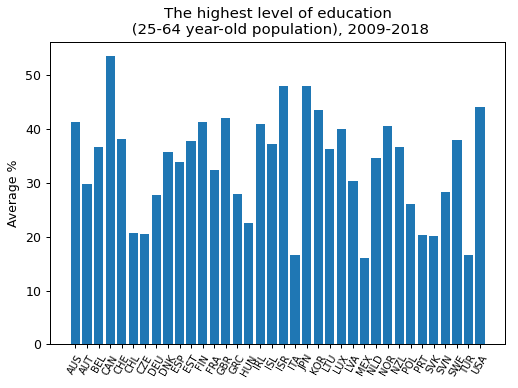

In [14]:
# the highest level of education

fig1, ax1=plt.subplots()

x=np.arange(len(edu_level_clean['LOCATION'].unique()))
y=edu_level_clean[edu_level_clean['SUBJECT']=='TRY'].groupby(['LOCATION'])['Value'].mean()

plt.bar(x,y)

tick_label=edu_level_clean['LOCATION'].sort_values().unique()
plt.xticks(np.arange(0,36,1), tick_label, fontsize=8, rotation=60)
plt.title("The highest level of education\n (25-64 year-old population), 2009-2018")
#plt.xlabel("Countries")
plt.ylabel("Average %")


plt.show()
plt.tight_layout()

plt.savefig("output_data/highestEduLevel.png")

<IPython.core.display.Javascript object>


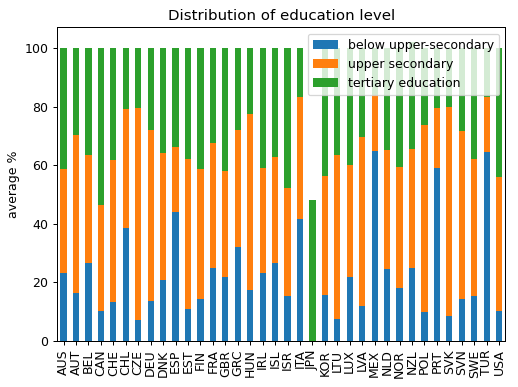

In [15]:
# distribution
df=edu_level_clean.groupby(['LOCATION','SUBJECT'])['Value'].mean().unstack('SUBJECT').fillna(0)
df[['BUPPSRY','UPPSRY','TRY']].plot(kind='bar',stacked=True)

plt.title("Distribution of education level")
plt.xlabel("")
plt.ylabel("average %")

labels=['below upper-secondary','upper secondary','tertiary education'] 
plt.legend(labels)

plt.show()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/eduLevels.png")

In [16]:
# --?? 
edu_level_clean[edu_level_clean['LOCATION']=='JPN'] # Japan has TRY only

,LOCATION,INDICATOR,SUBJECT,MEASURE,TIME,Value,Country
417,JPN,EDUADULT,TRY,PC_25_64,2009,43.764038,Japan
418,JPN,EDUADULT,TRY,PC_25_64,2010,44.809975,Japan
419,JPN,EDUADULT,TRY,PC_25_64,2011,46.364063,Japan
420,JPN,EDUADULT,TRY,PC_25_64,2012,46.619377,Japan
421,JPN,EDUADULT,TRY,PC_25_64,2013,47.311993,Japan
422,JPN,EDUADULT,TRY,PC_25_64,2014,48.185074,Japan
423,JPN,EDUADULT,TRY,PC_25_64,2015,49.541573,Japan
424,JPN,EDUADULT,TRY,PC_25_64,2016,50.496956,Japan
425,JPN,EDUADULT,TRY,PC_25_64,2017,51.440529,Japan
426,JPN,EDUADULT,TRY,PC_25_64,2018,51.928062,Japan


In [14]:
# # region filters
# west_f=['GBR', 'ESP', 'AUT', 'FRA', 'DEU', 'IRL', 'CHE', 'ITA', 'LUX', 'GRC', 'ISR'
#                   'NLD', 'BEL', 'AUS', 'NZL', 'PRT', 'TUR', 'CAN']
# east_f=['EST', 'CZE', 'LVA', 'LTU', 'HUN', 'SVK', 'SVN', 'POL'] 
# scand_f = ['NOR', 'FIN' ,'ISL', 'SWE', 'DNK']
# us_f = ['USA']
# asia_f = ['KOR', 'JPN']
# latin_f = ['MEX', 'CHL']

In [15]:
# #-- west
# edu_level_west=edu_level_clean[edu_level_clean['LOCATION'].isin(west_f)]
# edu_level_west.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
9,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2009,28.972523
10,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2010,26.792744
11,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2011,25.922543
12,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2012,23.563389
13,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2013,24.284430


In [16]:
# west_gr_ter=edu_level_west[edu_level_west['SUBJECT']=='TRY'].groupby(edu_level_west['LOCATION']).mean()
# #west_gr_ter
# west_gr_upsec=edu_level_west[edu_level_west['SUBJECT']=='UPPSRY'].groupby(edu_level_west['LOCATION']).mean()

# west_gr_bsec=edu_level_west[edu_level_west['SUBJECT']=='BUPPSRY'].groupby(edu_level_west['LOCATION']).mean()



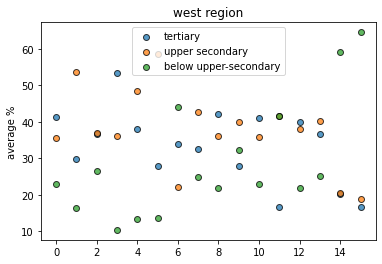

In [17]:
# #-- west region
# fig1, ax1 =plt.subplots()

# x1=np.arange(len(west_gr_ter['TIME']))
# y1=west_gr_ter['Value']
# s1=plt.scatter(x1,y1, edgecolors="black", alpha=0.75)

# x2=np.arange(len(west_gr_upsec['TIME']))
# y2=west_gr_upsec['Value']
# s2=plt.scatter(x2,y2, edgecolors="black", alpha=0.75)

# x3=np.arange(len(west_gr_bsec['TIME']))
# y3=west_gr_bsec['Value']
# s3=plt.scatter(x3,y3, edgecolors="black", alpha=0.75)

# plt.legend([s1,s2,s3],['tertiary','upper secondary','below upper-secondary'])
# plt.title("west region")
# plt.ylabel("average %")

# plt.show()

In [18]:
# # --usa
# edu_level_usa=edu_level_clean[edu_level_clean['LOCATION'].isin(us_f)]
# #edu_level_usa.head()

In [ ]:
# edu levels

### => + trade union density df

In [17]:
trade_unions_to_load = "Resources/ouputfile.csv"

tu_complete= pd.read_csv(trade_unions_to_load)
tu_complete

,Unnamed: 0,Country,Source,Series,Year,Unit,Value
0,54,Hungary,Survey data,Trade union density,2004,Percentage,16.8
1,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9
2,56,Hungary,Survey data,Trade union density,2015,Percentage,9.0
3,94,Poland,Administrative data,Trade union density,1999,Percentage,29.1
4,95,Poland,Administrative data,Trade union density,2000,Percentage,24.7
...,...,...,...,...,...,...,...
846,2507,Luxembourg,Survey data,Trade union density,2010,Percentage,40.0
847,2508,Luxembourg,Survey data,Trade union density,2011,Percentage,36.6
848,2509,Luxembourg,Survey data,Trade union density,2012,Percentage,35.2
849,2510,Luxembourg,Survey data,Trade union density,2013,Percentage,34.0


In [18]:
tu_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  851 non-null    int64  
 1   Country     851 non-null    object 
 2   Source      851 non-null    object 
 3   Series      851 non-null    object 
 4   Year        851 non-null    int64  
 5   Unit        851 non-null    object 
 6   Value       851 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 46.7+ KB


In [19]:
tu_reduced=tu_complete[(tu_complete['Year']>=2009)&(tu_complete['Year']<=2018)]

tu_reduced

,Unnamed: 0,Country,Source,Series,Year,Unit,Value
1,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9
2,56,Hungary,Survey data,Trade union density,2015,Percentage,9.0
13,104,Poland,Administrative data,Trade union density,2009,Percentage,16.3
14,105,Poland,Administrative data,Trade union density,2010,Percentage,18.3
15,106,Poland,Administrative data,Trade union density,2011,Percentage,17.0
...,...,...,...,...,...,...,...
846,2507,Luxembourg,Survey data,Trade union density,2010,Percentage,40.0
847,2508,Luxembourg,Survey data,Trade union density,2011,Percentage,36.6
848,2509,Luxembourg,Survey data,Trade union density,2012,Percentage,35.2
849,2510,Luxembourg,Survey data,Trade union density,2013,Percentage,34.0


In [20]:
tu_reduced['Country'].value_counts().count()

36

In [21]:
country_list_full=['Hungary', 'Poland', 'Mexico', 'Sweden', 'France', 'Norway', 'Iceland', 'Latvia', 'Estonia',
        'Switzerland', 'Belgium', 'Israel', 'Canada', 'New Zealand', 'Ireland', 'Chile', 'Spain', 'Finland',
       'Luxembourg', 'Korea', 'United Kingdom', 'Australia', 'Netherlands', 'Turkey', 'Greece', 'Austria', 'Denmark',
       'Slovak Republic', 'Slovenia', 'Japan', 'Czech Republic', 'Germany', 'Portugal', 'Italy', 'Lithuania', 'United States']

In [22]:
tu_clean=tu_reduced[tu_reduced['Country'].isin(country_list_full)]

tu_clean

,Unnamed: 0,Country,Source,Series,Year,Unit,Value
1,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9
2,56,Hungary,Survey data,Trade union density,2015,Percentage,9.0
13,104,Poland,Administrative data,Trade union density,2009,Percentage,16.3
14,105,Poland,Administrative data,Trade union density,2010,Percentage,18.3
15,106,Poland,Administrative data,Trade union density,2011,Percentage,17.0
...,...,...,...,...,...,...,...
846,2507,Luxembourg,Survey data,Trade union density,2010,Percentage,40.0
847,2508,Luxembourg,Survey data,Trade union density,2011,Percentage,36.6
848,2509,Luxembourg,Survey data,Trade union density,2012,Percentage,35.2
849,2510,Luxembourg,Survey data,Trade union density,2013,Percentage,34.0


In [24]:
edu_level_clean=edu_level_clean.rename(columns={'TIME':'Year'})
#edu_level_clean

df_full=pd.merge(edu_level_clean, tu_clean, on=['Country','Year'],suffixes=("_edu","_tu"))
df_full.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,Year,Value_edu,Country,Unnamed: 0,Source,Series,Unit,Value_tu
0,AUS,EDUADULT,BUPPSRY,PC_25_64,2009,28.972523,Australia,980,Survey data,Trade union density,Percentage,19.6
1,AUS,EDUADULT,TRY,PC_25_64,2009,36.881355,Australia,980,Survey data,Trade union density,Percentage,19.6
2,AUS,EDUADULT,UPPSRY,PC_25_64,2009,34.146122,Australia,980,Survey data,Trade union density,Percentage,19.6
3,AUS,EDUADULT,BUPPSRY,PC_25_64,2010,26.792744,Australia,981,Survey data,Trade union density,Percentage,18.4
4,AUS,EDUADULT,TRY,PC_25_64,2010,37.604309,Australia,981,Survey data,Trade union density,Percentage,18.4


In [25]:
# remove not needed columns
df_full_clean=df_full[['LOCATION','Country','INDICATOR','SUBJECT','MEASURE','Year','Value_edu','Value_tu']]

df_full_clean

,LOCATION,Country,INDICATOR,SUBJECT,MEASURE,Year,Value_edu,Value_tu
0,AUS,Australia,EDUADULT,BUPPSRY,PC_25_64,2009,28.972523,19.6
1,AUS,Australia,EDUADULT,TRY,PC_25_64,2009,36.881355,19.6
2,AUS,Australia,EDUADULT,UPPSRY,PC_25_64,2009,34.146122,19.6
3,AUS,Australia,EDUADULT,BUPPSRY,PC_25_64,2010,26.792744,18.4
4,AUS,Australia,EDUADULT,TRY,PC_25_64,2010,37.604309,18.4
...,...,...,...,...,...,...,...,...
1177,LTU,Lithuania,EDUADULT,TRY,PC_25_64,2017,40.273941,7.7
1178,LTU,Lithuania,EDUADULT,UPPSRY,PC_25_64,2017,52.554096,7.7
1179,LTU,Lithuania,EDUADULT,BUPPSRY,PC_25_64,2018,7.022464,7.1
1180,LTU,Lithuania,EDUADULT,TRY,PC_25_64,2018,41.654594,7.1


In [26]:
df_full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 1181
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   1182 non-null   object 
 1   Country    1182 non-null   object 
 2   INDICATOR  1182 non-null   object 
 3   SUBJECT    1182 non-null   object 
 4   MEASURE    1182 non-null   object 
 5   Year       1182 non-null   int64  
 6   Value_edu  1182 non-null   float64
 7   Value_tu   1182 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 83.1+ KB


In [27]:
df_full_clean=df_full_clean.drop_duplicates(subset=['Country','Year','SUBJECT'])
df_full_clean

,LOCATION,Country,INDICATOR,SUBJECT,MEASURE,Year,Value_edu,Value_tu
0,AUS,Australia,EDUADULT,BUPPSRY,PC_25_64,2009,28.972523,19.6
1,AUS,Australia,EDUADULT,TRY,PC_25_64,2009,36.881355,19.6
2,AUS,Australia,EDUADULT,UPPSRY,PC_25_64,2009,34.146122,19.6
3,AUS,Australia,EDUADULT,BUPPSRY,PC_25_64,2010,26.792744,18.4
4,AUS,Australia,EDUADULT,TRY,PC_25_64,2010,37.604309,18.4
...,...,...,...,...,...,...,...,...
1177,LTU,Lithuania,EDUADULT,TRY,PC_25_64,2017,40.273941,7.7
1178,LTU,Lithuania,EDUADULT,UPPSRY,PC_25_64,2017,52.554096,7.7
1179,LTU,Lithuania,EDUADULT,BUPPSRY,PC_25_64,2018,7.022464,7.1
1180,LTU,Lithuania,EDUADULT,TRY,PC_25_64,2018,41.654594,7.1


In [28]:
df_full_clean.to_csv("output_data/edu_tu_merged.csv")

In [30]:
#edu+tu
df_plot=df_full_clean.groupby(['LOCATION','SUBJECT']).max().unstack('SUBJECT').fillna(0)
#df_plot.head(10)

In [31]:
# df_plot_avr=df_full_clean.groupby(['LOCATION','SUBJECT']).mean().unstack('SUBJECT').fillna(0)
# df_plot_avr

<IPython.core.display.Javascript object>


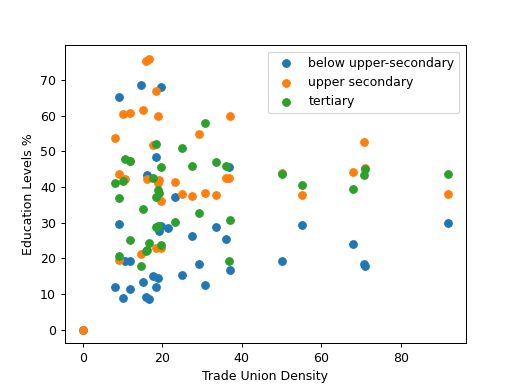

In [33]:
y1=df_plot['Value_edu']['BUPPSRY']
x1=df_plot['Value_tu']['BUPPSRY']

d1_tu=plt.scatter(x1,y1)   #  => blue


y2=df_plot['Value_edu']['UPPSRY']
x2=df_plot['Value_tu']['UPPSRY']

d2_tu=plt.scatter(x2,y2)    # orange

y3=df_plot['Value_edu']['TRY']
x3=df_plot['Value_tu']['TRY']

d3_tu=plt.scatter(x3,y3)     #  => green



plt.xlabel("Trade Union Density")
plt.ylabel('Education Levels %')

plt.legend([d1_tu,d2_tu,d3_tu],['below upper-secondary','upper secondary','tertiary'])

plt.savefig("output_data/edu_vs_tu.png")

<IPython.core.display.Javascript object>


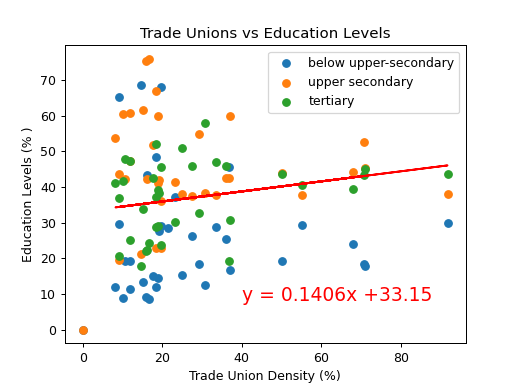

The r-value is: 0.07633529794632184


In [39]:
x1=df_plot['Value_tu']['BUPPSRY']
y1=df_plot['Value_edu']['BUPPSRY']
d1_tu=plt.scatter(x1,y1)   # (green) => blue


x2=df_plot['Value_tu']['UPPSRY']
y2=df_plot['Value_edu']['UPPSRY']
d2_tu=plt.scatter(x2,y2)    # orange


x3=df_plot['Value_tu']['TRY']
y3=df_plot['Value_edu']['TRY']
d3_tu=plt.scatter(x3,y3)     # (blue) => green




#----------------------------------------

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x3, y3)

# Get regression values
regress_values = x3 * slope + intercept

# Create line equation string
#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq = "y = " + str(round(slope,4)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
#plt.scatter(x1,y1)
plt.plot(x3, regress_values, "r-")

plt.title("Trade Unions vs Education Levels")
plt.xlabel("Trade Union Density (%)")
plt.ylabel('Education Levels (% )')

plt.legend([d1_tu,d2_tu,d3_tu],['below upper-secondary','upper secondary','tertiary'])


plt.annotate(line_eq,(40,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

     # The r-value is: 0.07633529794632184 <= try
    # The r-value is: 0.0009562619990799475 <= upp
    # The r-value is: 1.071445683119063e-05 <= bupp   => correlate !!

plt.savefig("output_data/edutu_try.png") 
    

### + GINI

In [40]:
gini_to_load = "Resources/gini_tot.csv"

gini_complete= pd.read_csv(gini_to_load)
gini_complete

,Unnamed: 0,Country,Year,Value_union,MEASURE,Age group,Value_gini_cpi
0,0,Hungary,2009,11.9,GINI,Total population,0.241
1,1,Hungary,2009,11.9,GINI,Total population,0.272
2,18,Hungary,2015,9.0,GINI,Total population,0.284
3,27,Hungary,2015,9.4,GINI,Total population,0.284
4,36,Poland,2009,16.3,GINI,Total population,0.303
...,...,...,...,...,...,...,...
442,3978,United States,2013,10.8,GINI,Total population,0.396
443,3987,United States,2014,10.7,GINI,Total population,0.394
444,3996,United States,2015,10.6,GINI,Total population,0.390
445,4005,United States,2016,10.3,GINI,Total population,0.391


In [41]:
edu_level_clean2=edu_level_clean2.rename(columns={'TIME':'Year'})
#edu_level_clean2

df_full_2=pd.merge(edu_level_clean2, gini_complete, on=['Country','Year'],suffixes=("_edu","_gini"))
df_full_2

NameError: name 'edu_level_clean2' is not defined